#Problem statement

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having a higher chance of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You, as a data scientist at EasyVisa, have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.



# Data Dictionary

* **case_id:** ID of each visa application
* **continent:** Information of continent the employee
* **education_of_employee:** Information of education of the employee
* **has_job_experience:** Does the employee have any job experience? Y= Yes; N = No
* **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
* **no_of_employees:** Number of employees in the employer's company
* **yr_of_estab:** Year in which the employer's company was established
* **region_of_employment:** Information of foreign worker's intended region of employment in the US.
* **prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position:** Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* **case_status:** Flag indicating if the Visa was certified or denied

#Loading Necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#Loading the dataset

In [ ]:
from google.colab import files
files.upload()
data = pd.read_csv('EasyVisa.csv')
df = data.copy()

Saving EasyVisa.csv to EasyVisa.csv


#Data Description

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
df.shape

(25480, 12)

There are 25480 rows and 12 columns meaning there are 25480 values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are 0 missing values in the dataset. every column has 25480 non null values which is the shape of the dataset.
* out of all the 12 columns no_of_employees and yr_of_establishment is of the int data type and prevailing_wage is of the float datatype and the rest of the columns is of the object datatype.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* **no_of_employees**: the minimum value is shown to be -26 which is not possible as the employee count cant be negative. the average number of employees is found to be 5667.
* **yr_of_estab**: the minimum values is 1800 meaning there are companies esblaished in 1800 and as recent as 2016
* **prevailing_wage**: the average wage of the employees in the given dataset is 74455. The minimum value is 2.1367 which may be an hourly wage. the max value is 319210.

In [ ]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
case_id,25480,25480,EZYV25480,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* **case_id**: It is a unique identifier of all the people in the dataset so it can be dropped.
* **continent**: The most people belong to asia continent with 16861 people applying for visa.
* **education_of_employee**: more than 10234 people applying for visa have the bachelors degree
* **has_job_experience**: Most of the people applying for visa have a work experience.
* **requires_job_training**: the frequency is high for no which means more than 22000 people applying for visa doesnt require training.
* **region_of_employment**: there are 5 unique values in which northeast has the high frequency meaning most people have their region of employment as northeast.
* **unit_of_wage**: There are 4 unique values in which the frequency is high for year meaning most people have an yearly wage.
* **full_time_position**: most of the people applying for visa have a fulltime position in their employment as shown that 22773 people have a full time position.
* **case_status**: This is the target variable to be predicted. The frequency is high for certified indicating most of the people (more than 17000) has been certified for visa.

In [ ]:
#dropping case_id
df.drop('case_id',axis = 1, inplace = True)

In [ ]:
for i in df.select_dtypes(include = 'object').columns:
  print(f'{df[i].value_counts(normalize = True)}')
  print('-'*50)

continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64
--------------------------------------------------
region_of_employment
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: proportion, dtype: float64
--------------------------------------------------
unit_of_wage
Year     0.901177
Hour     0.084655
Week     0.010675
M

* The target variable shows that certified has the high frequency which is 66.8% while 33.2% of the dataset is denied for visa

#Missing value treatment

In [ ]:
df.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


There are no missing values in the dataset

#Duplicate values treatment

In [ ]:
df.duplicated().sum()

np.int64(0)

There are no duplicated values in the dataset

#Feature engineering

* There are some negative values in no_of_employees columns which is not possible.
* So the values are converted into positive values.

In [ ]:
df[df['no_of_employees']<0].value_counts().sum()

np.int64(33)

There are 33 negative values in the no_of_employees columns

In [ ]:
df['no_of_employees'] = df['no_of_employees'].abs()

In [ ]:
df['no_of_employees'].describe().T

,no_of_employees
count,25480.000000
mean,5667.089207
std,22877.917453
min,11.000000
25%,1022.000000
50%,2109.000000
75%,3504.000000
max,602069.000000


* The values in no_of_employees columns is converted into positive values but the mean and standard deviation remains unchanged

* the columns has_job_experience, requires_job_training and full_time_position are categorical in nature and converted into categorical variables and are replaced by the following,

  * Y = 1

  * N = 0

In [ ]:
df.replace({'Y':1, 'N':0}, inplace = True)

/tmp/ipython-input-3426733079.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Y':1, 'N':0}, inplace = True)


In [ ]:
df[['has_job_experience','requires_job_training','full_time_position']] = df[['has_job_experience','requires_job_training','full_time_position']].astype('category')

In [ ]:
df[['has_job_experience','requires_job_training','full_time_position']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   has_job_experience     25480 non-null  category
 1   requires_job_training  25480 non-null  category
 2   full_time_position     25480 non-null  category
dtypes: category(3)
memory usage: 75.1 KB


* The values in these columns are converted into 0 and 1 and are converted into categorical columns.

* the column case_status is the target variable and it needs to be encoded as a categorical variable.
* So it is encoded as the following.
  * Certified - 1
  * Denied - 0

In [ ]:
df.replace({'Certified':1, 'Denied':0}, inplace = True)

/tmp/ipython-input-648783097.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Certified':1, 'Denied':0}, inplace = True)


In [ ]:
df['case_status'] = df['case_status'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  object  
 1   education_of_employee  25480 non-null  object  
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  object  
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  object  
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(4), float64(1), int64(2), object(4)
memory usage: 1.5+ MB


* Now the required columns are converted into categorical columns

# Exploratory data analysis

##Univariate analysis

###Numerical data

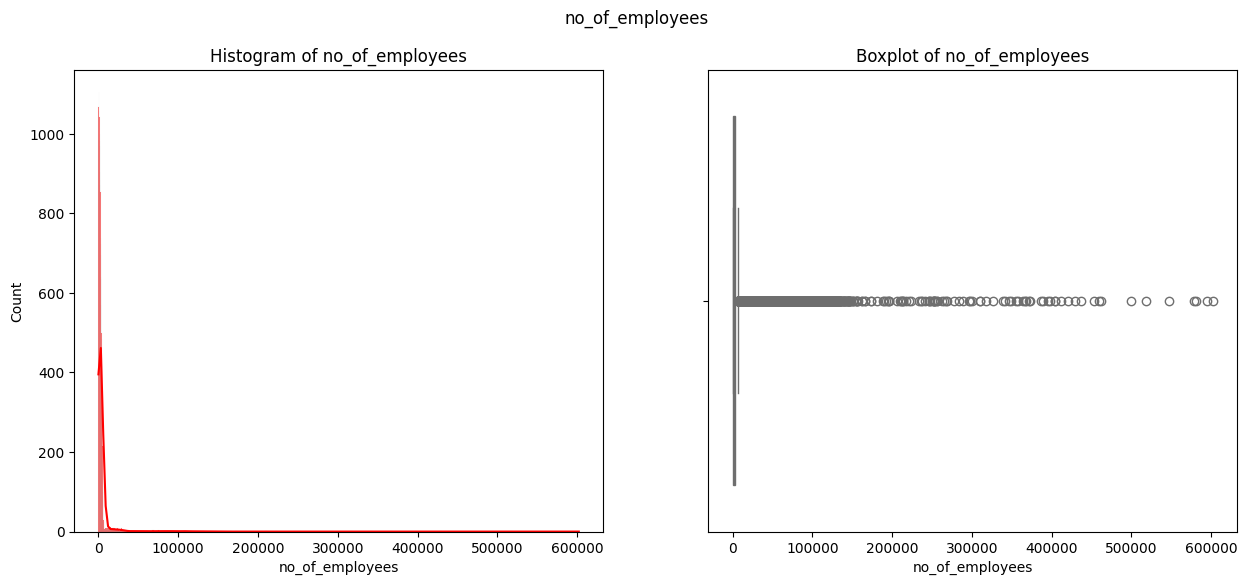

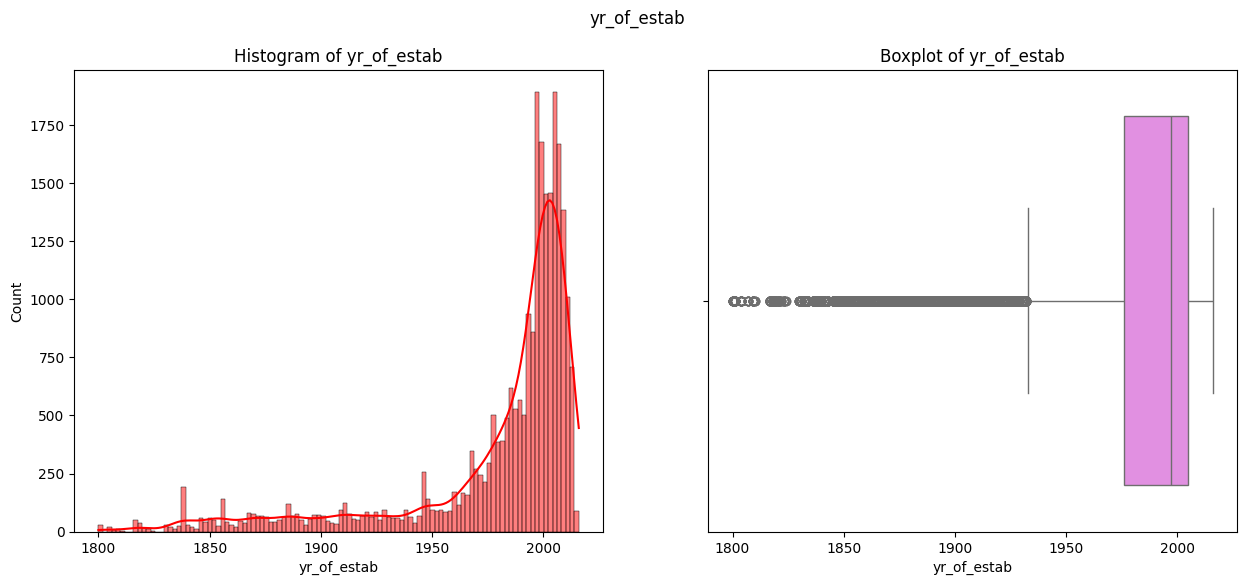

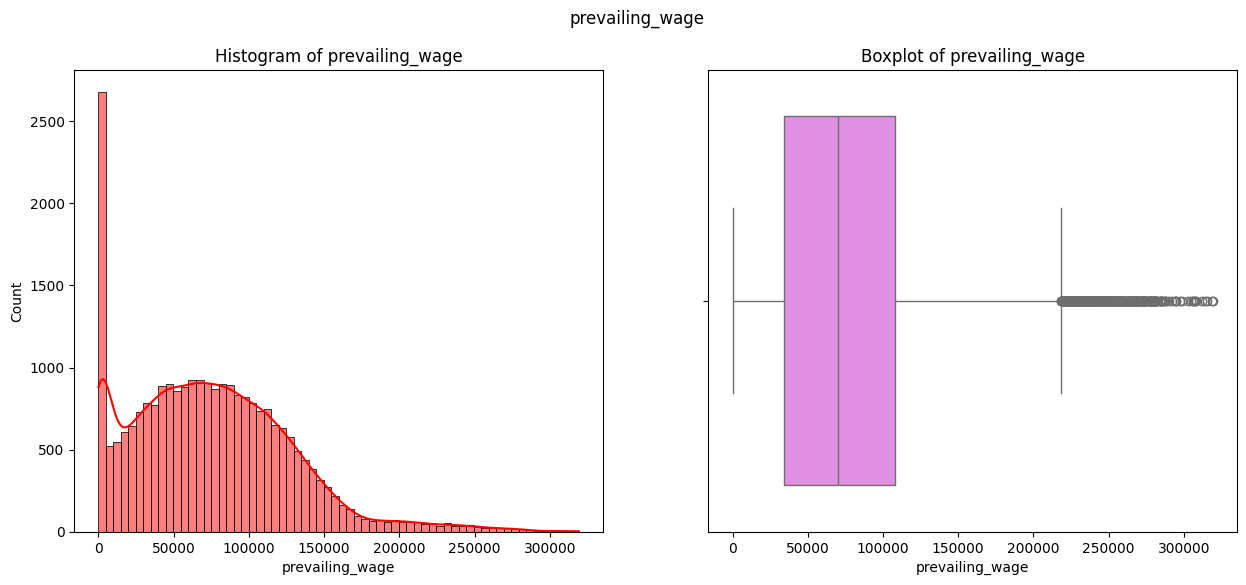

In [ ]:
for i in df.select_dtypes(exclude = ['object','category']).columns:
  fig, ax = plt.subplots(1,2, figsize = (15,6))
  sns.histplot(data = df, x = i, ax = ax[0], kde = True, color = 'red')
  sns.boxplot(data = df, x = i, ax = ax[1], color = 'violet')
  ax[0].set_title(f'Histogram of {i}')
  ax[1].set_title(f'Boxplot of {i}')
  fig.suptitle(f'{i}')
  plt.show()

* **no_of_employees**: Shows a heavy right skewed distribution. The box plot shows that the data has a large number of outliers. The data also shows more than 75% of the data have the employee count less than 10.
* **yr_of_estab**: Shows a heavy left skewed distribution. The box plot shows that the more than 50% of the data have the year of establishment less than 2000. It also indicate a lot of outliers in the data.
* **prevailing_wage**: SHows a right skewed distribution. THe bosplot indicate more than 25% of the data shows the wages less than 30000. More than 75% of the data shows the prevailing wage of less than 125000. The wages are split between yearly, weekly, hourly and monthly so the presence of outliers is acceptable.

###catagorical data

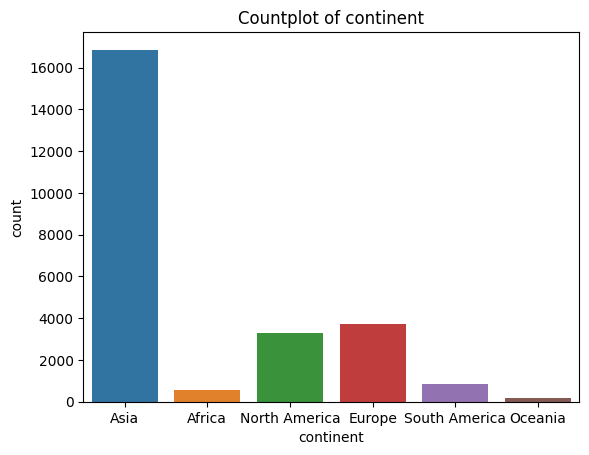

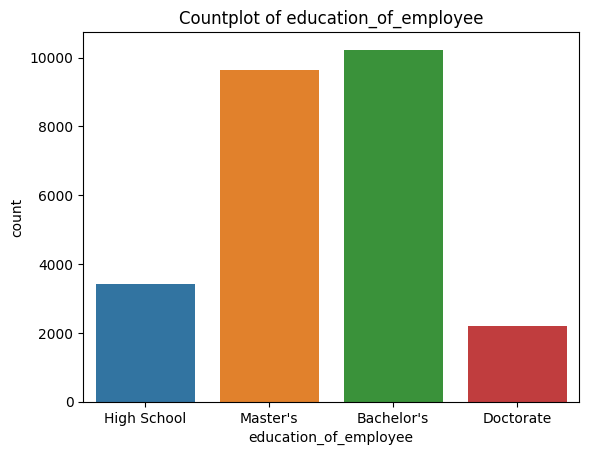

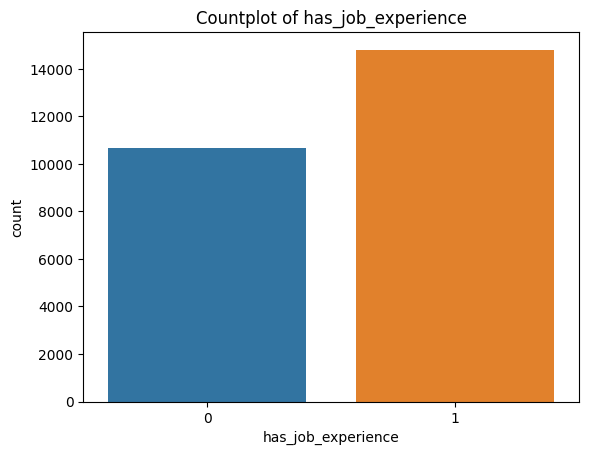

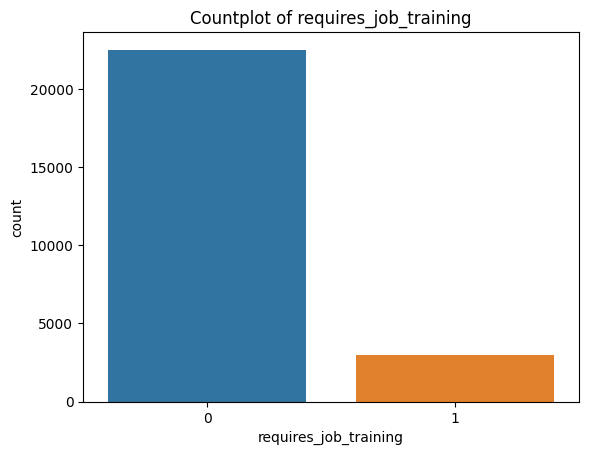

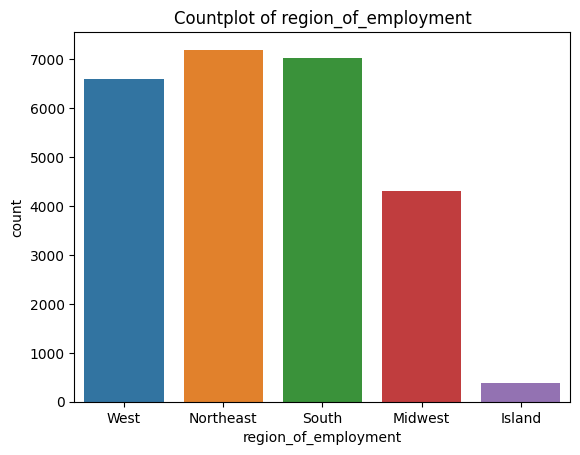

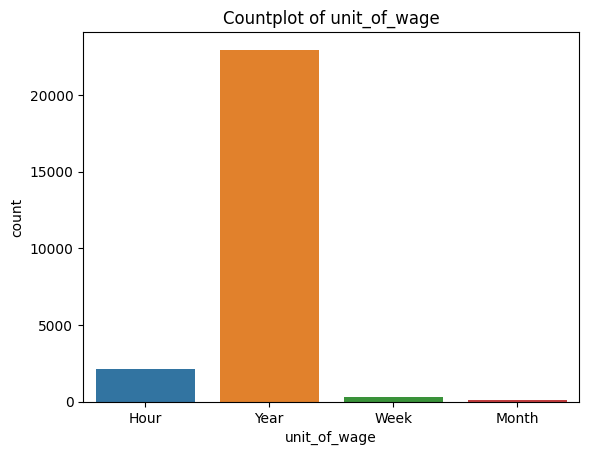

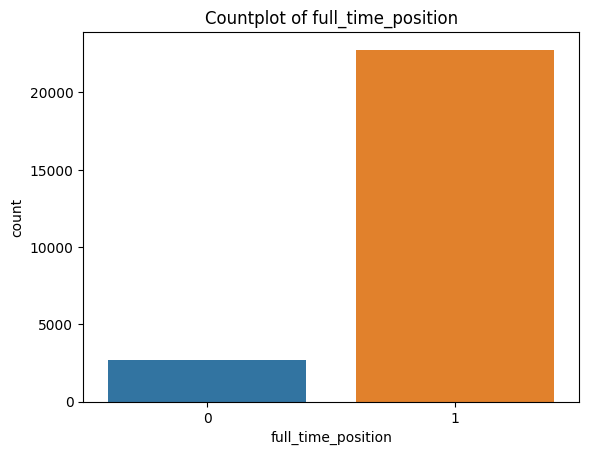

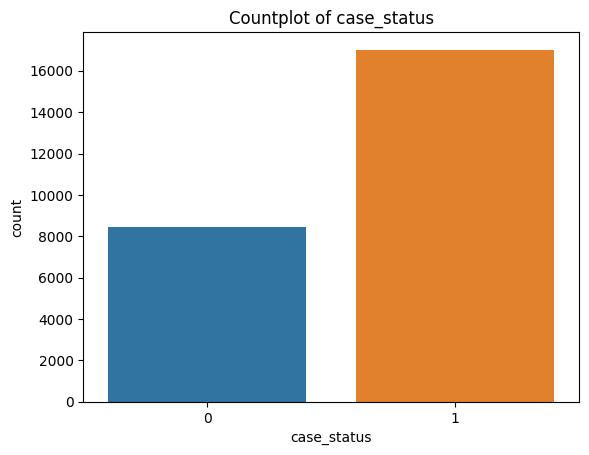

In [ ]:
for i in df.select_dtypes(include = ['object','category']).columns:
  sns.countplot(data = df, x = i, hue = i, legend = False)
  plt.title(f'Countplot of {i}')
  plt.show()

* **Continent**: Asia has the maximum number(more than 16000) of employees applying for visa, followed by Europe and North America.
* **education_of_employee**: THe graph shows that most people who applied for visa has completed their bachelors degree which has the count of more than 10000 followed bymasters and high school.
* **has_job_experience**: Most of the employees applying for the visa currently has job experience.
* **requires_job_training**: More than 20000 of the employees who applied for visa doesnt require job training which is acceptable as they currently have job experience.
* **region_of_employment**: 7000 of the employees have their employment in the  northeast region of the US followed by south and western regions.
* **unit_of_wage**: Most of the employees have given their yearly wage followed by hourly.
* **full_time_position**: More than 20000 employees applying for visa have been a full time employment.
* **case_status**: This is the target variable. It shows that  more than 16000 of the employees have been certified for visa.

##Bivariate analysis

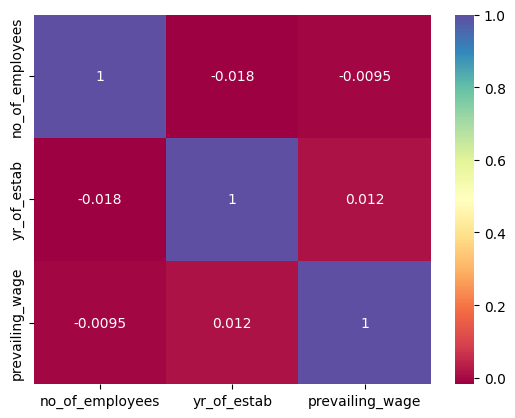

In [ ]:
sns.heatmap(data = df.corr(numeric_only = True),annot = True, cmap = 'Spectral');

* Heat map shows that the numerical columns doesnt have strong correlation towards each other

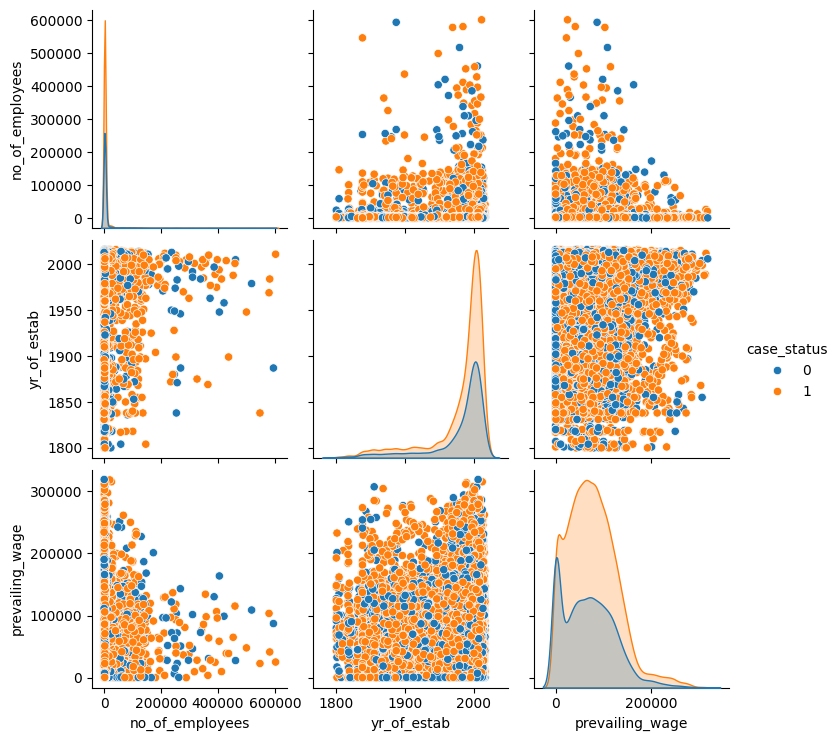

In [ ]:
sns.pairplot(data = df, hue = 'case_status', diag_kind = 'kde');

* pair plot also indicates that the numeric values have no correlation.

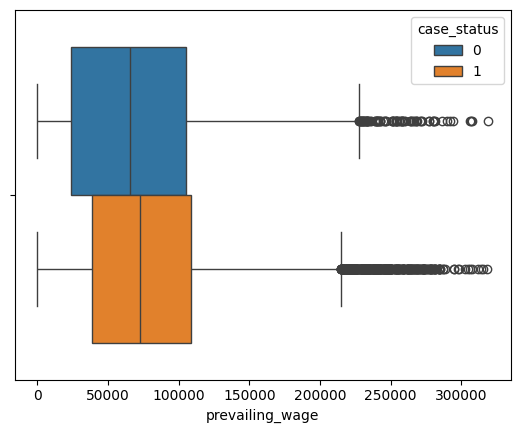

In [ ]:
sns.boxplot(data = df, x = 'prevailing_wage', hue  = 'case_status');

* The wage spreads of the certifierd and denied cases are similar.
* the median lies between 75000 in both cases suggesting higher wage doesnt imply the visa will be certified.
* There are outliers in both cases.

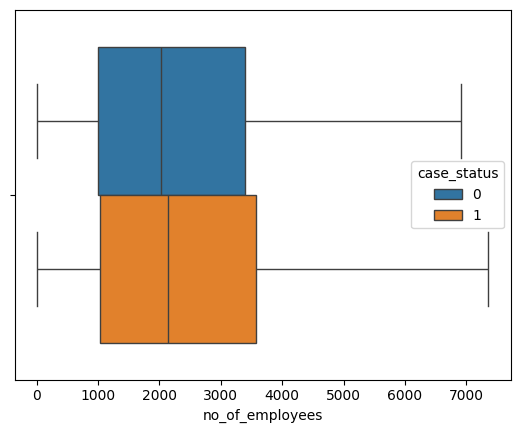

In [ ]:
sns.boxplot(data = df, x = 'no_of_employees', hue  = 'case_status', showfliers = False);

* The box plot for both approved and denied cases are similar indicating that visa certificating doenst rely on the no 0f employees in the company.

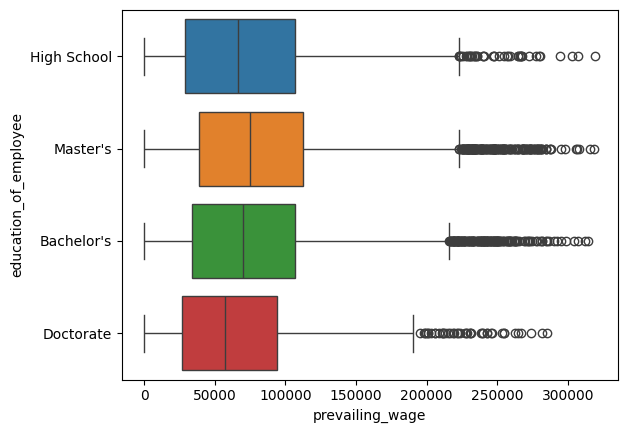

In [ ]:
sns.boxplot(data = df, x = 'prevailing_wage', y = 'education_of_employee', hue = 'education_of_employee',legend = False );

* The box plot indicates the employees with doctorate education gets a slightly lower wage than others.
* Higher salary is offered to the employees with a masters degree as the median value is slightly higher.

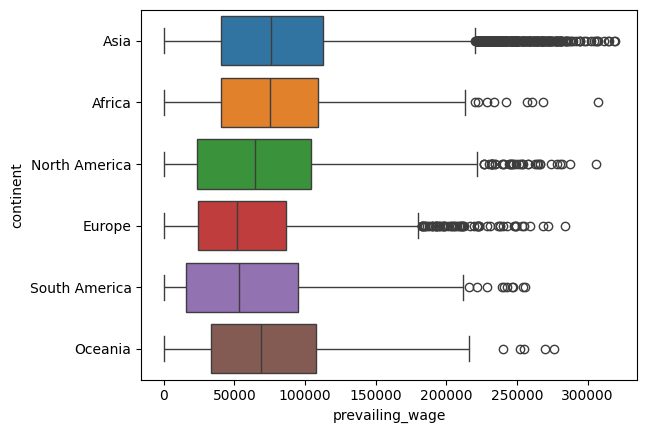

In [ ]:
sns.boxplot(data = df, x = 'prevailing_wage',y = 'continent', hue = 'continent', legend = False);

* Employees from Asia and oceania gets a higher prevailing wage compared to others. But the outliers are higher for asia and europe indicating they get higher salary compared to others.
* median values for all the continents are similar indicating there is no major difference in wages by the continents.

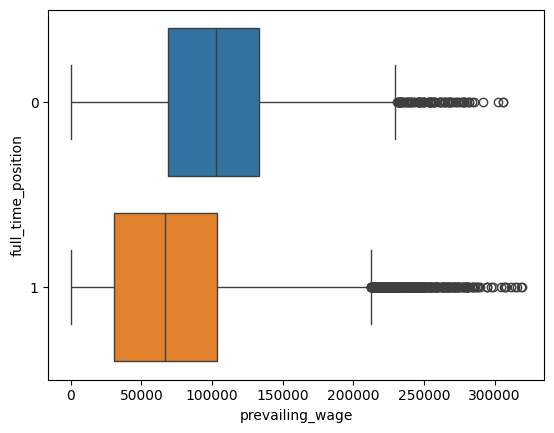

In [ ]:
sns.boxplot(data = df, x = 'prevailing_wage',y = 'full_time_position', hue = 'full_time_position', legend = False);

* The median values of the non full time position is higher indicating more demand for their expertise leading to higher salary.
* full time postiton employees has a higer value of outliers indicating that there are employees getting higher salary compared to non full time employees.
* 25% of the non full time employees gets a higher salary compared to a full time employeesindicating their expertise and demand.

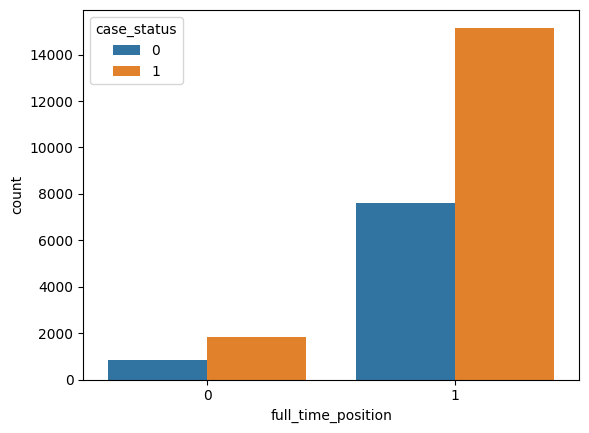

In [ ]:
sns.countplot(data = df, x = 'full_time_position', hue = 'case_status');

* The bar plot shows that there are more visa applications for more full time role than non full time role.
* More than 14000 of the full time role application relulted in approval indicating most employees having a full time job gets approved. This shows a fulltime role has a high likelihood for visa approval
* The number of denials for a full time role is also high. This can be due to various factors like training required etc.
* Non fulltime applications is low compared to the full time. The approved rate is slighly higher than denials but the difference is not too high compared to full time roles showing approval rate is higher for full time roles than non fulltime roles.

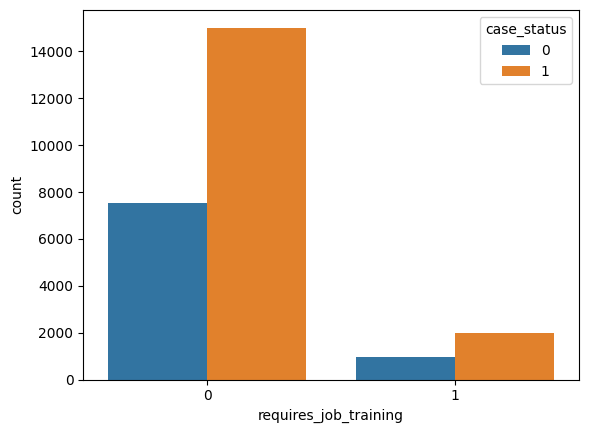

In [ ]:
sns.countplot(data = df, x = 'requires_job_training', hue = 'case_status');

* The maximum visa applications are from employees with no training requirement.
* The difference between approved and denied is higher for 0 job training than needs job training indicating that the employees that requires no job training has a high likelihood for visa approval.

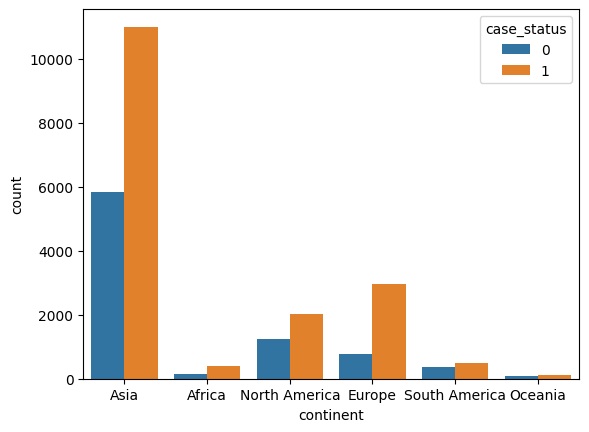

In [ ]:
sns.countplot(data = df, x = 'continent', hue = 'case_status');

* Asia has the highest count for visa applications.
* The approval rate is higher for asia and europe indicating a likelihood for visa approval in that continent.
* For oceania and south america the approval rate is very low indicating a low approval rate.

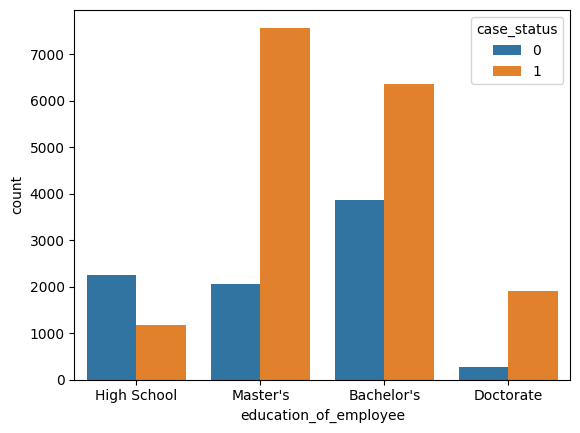

In [ ]:
sns.countplot(data = df, x = 'education_of_employee', hue = 'case_status');

* masters education has a higher approval rate followed by bachelors degree indicating a high likelihood for visa approval.
* employees with high school education has a high likelihood for denial as the denial rate is high compared to others.

#Outlier detection and treatment

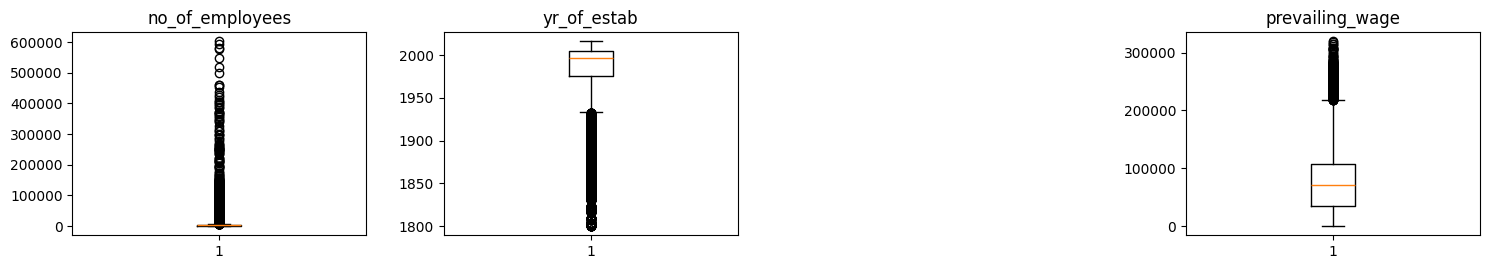

In [ ]:
plt.figure(figsize=(15, 12))

for i in df.select_dtypes(include = 'number'):
    plt.subplot(5,4, df.columns.get_loc(i) + 1)
    plt.boxplot(df[i], whis=1.5)
    plt.title(i)

plt.tight_layout()
plt.show()

* The graph shows a lot of outliers in the data.
* But the outliers are not treated as they are geniune values.

#Data preparation for modelling

* The categorical data is converted into numerical data by adding dummy variables.
* Then the data is split into training, validation and test sets to avoid data leakage.

In [ ]:
columns = ['continent', 'education_of_employee','region_of_employment','unit_of_wage']
x = df.drop('case_status', axis = 1)
y = df['case_status']
x = pd.get_dummies(data = x, columns = columns, drop_first = True, dtype = 'float')

In [ ]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y, test_size = 0.4, random_state = 1, stratify = y)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp, test_size = 0.5, random_state = 1, stratify = y_temp)

In [ ]:
print(x_train.shape, x_val.shape, x_test.shape)

(15288, 21) (5096, 21) (5096, 21)


In [ ]:
print(y_train.value_counts(normalize = True))
print(y_val.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

case_status
1    0.667909
0    0.332091
Name: proportion, dtype: float64
case_status
1    0.667779
0    0.332221
Name: proportion, dtype: float64
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


The training and test set have a equal propotion of the target variable classification

#Model Building

* For the above data 5 models is to be built namely,
  * Decision tree classifier
  * Random forest classifier
  * bagging classifier
  * Adaptive boosting classifier
  * XGboost classifier
* From the above 5 models the best model is selected by comparing the performance metrics on training, validation and test sets.

**Metric to be used**

The metrics to be used for comparing the dataset is **f1 score** because f1 score balances the models ability to find the true positives and true negatives respectively.

In [ ]:
def metric(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def conf(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##1. Decision tree Classifier

In [ ]:
dc = DecisionTreeClassifier(random_state = 1)
dc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
metric(dc, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
metric(dc, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.659537,0.734058,0.750601,0.742237


In [ ]:
metric(dc, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.663462,0.745006,0.749631,0.747311


* The model is oversampled as the f1 score is varied between training, validation and test sets.
* F1 scorw is similar fro validation and test sets

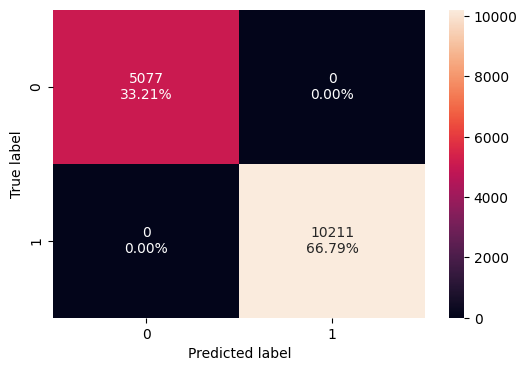

In [ ]:
conf(dc, x_train, y_train)

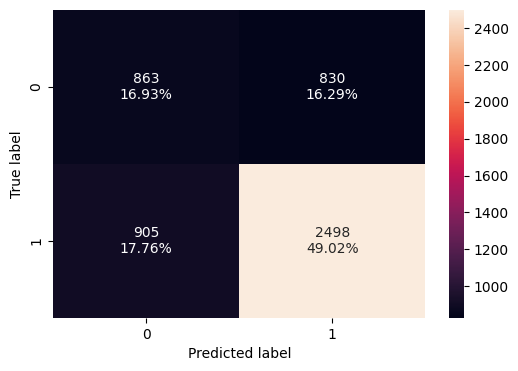

In [ ]:
conf(dc, x_val, y_val)

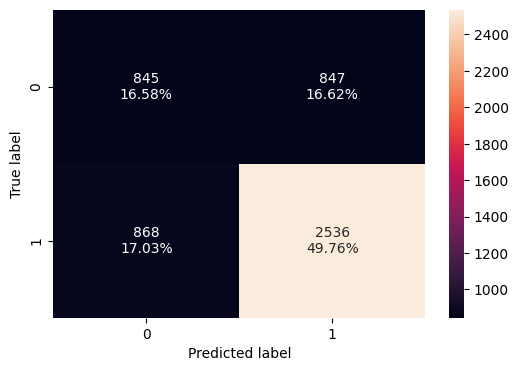

In [ ]:
conf(dc, x_test, y_test)

##2. Random forest classifier

In [ ]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
metric(rf, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
metric(rf, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.730965,0.83779,0.776839,0.806164


In [ ]:
metric(rf, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.714482,0.827262,0.764594,0.794695


* The performance metrics in test and validation sets is higher than decision tree classifier.
* The model is oversampled as the performance metrics across training, validation and test sets are diffierent.

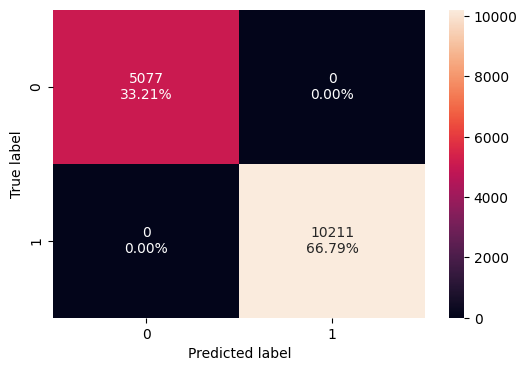

In [ ]:
conf(rf, x_train, y_train)

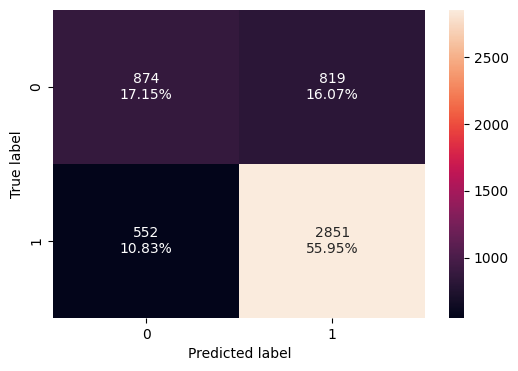

In [ ]:
conf(rf, x_val, y_val)

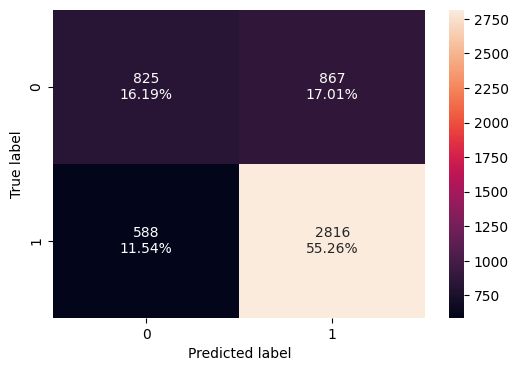

In [ ]:
conf(rf, x_test, y_test)

##3. Bagging classifer

In [ ]:
bc = BaggingClassifier(random_state = 1)
bc.fit(x_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
metric(bc, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.983582,0.986485,0.988906,0.987694


In [ ]:
metric(bc, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.695251,0.77079,0.772379,0.771584


In [ ]:
metric(bc, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.695644,0.776146,0.770038,0.77308


* The model is slightly oversampled as the training set performance is higher than validation and test set performance.
* The f1 score is higher than decision tree model but lesser than random forest model.

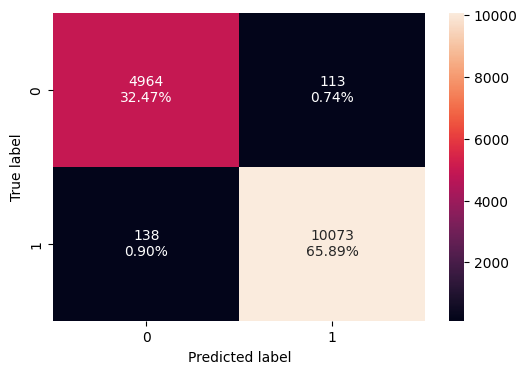

In [ ]:
conf(bc, x_train, y_train)

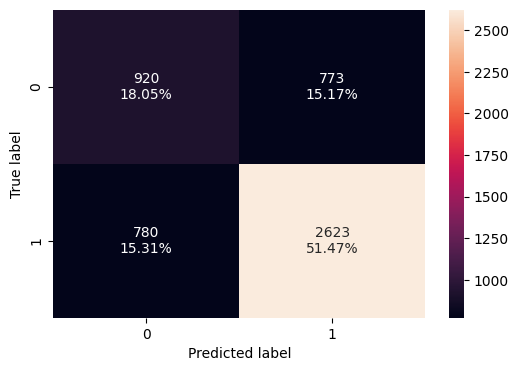

In [ ]:
conf(bc, x_val, y_val)

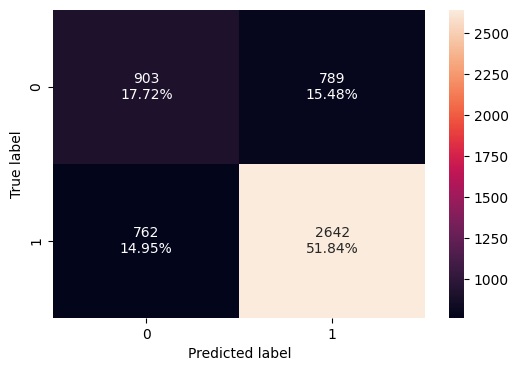

In [ ]:
conf(bc,x_test,y_test)

##4. Adaptive boosting classifer

In [ ]:
ac = AdaBoostClassifier(random_state = 1)
ac.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
metric(ac, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.744767,0.883851,0.768674,0.822249


In [ ]:
metric(ac, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.741954,0.880694,0.767281,0.820085


In [ ]:
metric(ac, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.732143,0.87691,0.759349,0.813906


* The model is not over sampled or undersampled as the performance in training, validation and test sets are fairly similar.
* The f1 score on the validation and test sets are higher compared to previous models ie., decision tree, random forest and adaptive boosting classifier.

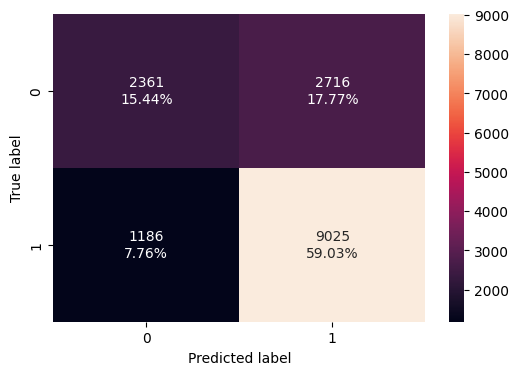

In [ ]:
conf(ac, x_train, y_train)

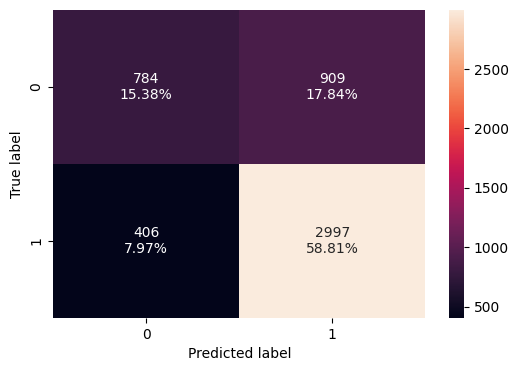

In [ ]:
conf(ac, x_val, y_val)

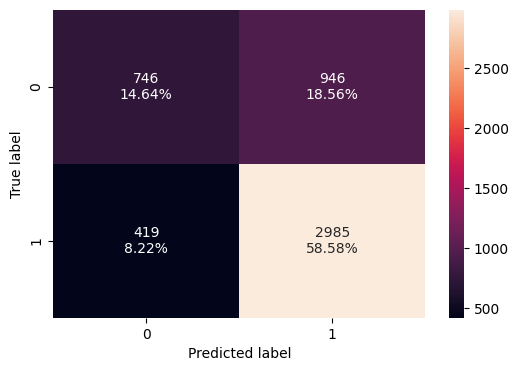

In [ ]:
conf(ac, x_test,y_test)

##5. XGBoost classifier

In [ ]:
xgb = XGBClassifier(random_state = 1, eval_metric = f1_score,enable_categorical = True)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True,
              eval_metric=<function f1_score at 0x7bb98d8fc180>,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
metric(xgb, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.854657,0.94075,0.855921,0.896333


In [ ]:
metric(xgb, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.737637,0.856303,0.774588,0.813398


In [ ]:
metric(xgb, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.726452,0.856639,0.762951,0.807086


* The model is not over sampled or under sampled as the performance metrics are fairly similar.
* The f1 score is 0.80 showing the model can predict 80% of the visa applications certification or denial.

#Oversampling of the data

In [ ]:
y_train.value_counts(normalize = True)

,proportion
case_status,
1,0.667909
0,0.332091


* The abova data shows that the model is not balanced.
* So the model may be biased for the certified visa applications as the case status of certified has the highest frequency.
* To balance the data and making the model unbiased the training dataset is oversampled and undersampled. The model is selected based on the performance the f1 score

In [ ]:
#importing necessary libraries for oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
sm = SMOTE(sampling_strategy=0.8, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(x_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 10211
Before OverSampling, count of label '0': 5077 

After OverSampling, count of label '1': 10211
After OverSampling, count of label '0': 8168 

After OverSampling, the shape of train_X: (18379, 21)
After OverSampling, the shape of train_y: (18379,) 



In [ ]:
#1. Decision tree
dc_over = DecisionTreeClassifier(random_state = 1)
dc_over.fit(x_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [ ]:
metric(dc_over, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
metric(dc_over, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.654239,0.730826,0.746175,0.73842


In [ ]:
metric(dc_over, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.651688,0.72973,0.743935,0.736764


* The model is oversampled.
* The f1 score doest change much likely due to over sampling

In [ ]:
#2. Random forest
rc_over = RandomForestClassifier(random_state = 1)
rc_over.fit(x_train_over, y_train_over)

RandomForestClassifier(random_state=1)

In [ ]:
metric(rc_over, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.999946,1.0,0.999902,0.999951


In [ ]:
metric(rc_over, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.729396,0.83397,0.777108,0.804536


In [ ]:
metric(rc_over, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.717033,0.828731,0.766576,0.796443


* The model is overfit.
* Similar to decision tree classifier the f1 score doesnt change compared to previous model likely due to oversampling.

In [ ]:
#3. Bagging classifier
bc_over = BaggingClassifier(random_state = 1)
bc_over.fit(x_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [ ]:
metric(bc_over, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.987649,0.9858,0.99192,0.98885


In [ ]:
metric(bc_over, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.701531,0.765501,0.782752,0.774031


In [ ]:
metric(bc_over,x_test,y_test)

,Accuracy,Recall,Precision,F1
0,0.693289,0.771445,0.769862,0.770653


* The model performance doesnt change after oversampling.

In [ ]:
#4. Adaptive boosting classifier
x_train_over = x_train_over.fillna(0)
ac_over = AdaBoostClassifier(random_state = 1)
ac_over.fit(x_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [ ]:
metric(ac_over, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.774689,0.843796,0.771905,0.806251


In [ ]:
metric(ac_over, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.733124,0.842198,0.776904,0.808235


In [ ]:
metric(ac_over, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.725471,0.84577,0.76712,0.804527


* The f1 score is fairly similar in training validation and test sets.

In [ ]:
#5. XGboost classifier
xgb_over = XGBClassifier(random_state = 1, eval_metric = f1_score, enable_categorical = True)
xgb_over.fit(x_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True,
              eval_metric=<function f1_score at 0x7ef38bbf74c0>,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
metric(xgb_over, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.869525,0.927431,0.851083,0.887618


In [ ]:
metric(xgb_over, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.737834,0.850132,0.777897,0.812412


In [ ]:
metric(xgb_over, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.718014,0.845182,0.759704,0.800167


* The model performance is similar in training and test sets.
* The performance of the model doesnt change after oversampling.

#Undersampling

In [ ]:
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 1)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

In [ ]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_under == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_under == 0)))

print("After Under Sampling, the shape of train_X: {}".format(x_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, count of label '1': 10211
Before Under Sampling, count of label '0': 5077 

After Under Sampling, count of label '1': 5077
After Under Sampling, count of label '0': 5077 

After Under Sampling, the shape of train_X: (10154, 21)
After Under Sampling, the shape of train_y: (10154,) 



In [ ]:
#1. Decision tree classifier
dc_under = DecisionTreeClassifier(random_state = 1)
dc_under.fit(x_train_under, y_train_under)

DecisionTreeClassifier(random_state=1)

In [ ]:
metric(dc_under, x_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
metric(dc_under, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.62029,0.620041,0.766715,0.685621


In [ ]:
metric(dc_under, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.624411,0.625441,0.769147,0.68989


* The model is overfit.
* The model performance is very low as the training dataset is undersampled which may lead to loss of information

In [ ]:
#2. Random forest classifier
rc_under = RandomForestClassifier(random_state = 1)
rc_under.fit(x_train_under, y_train_under)

RandomForestClassifier(random_state=1)

In [ ]:
metric(rc_under, x_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
metric(rc_under, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.680338,0.672348,0.81656,0.73747


In [ ]:
metric(rc_under, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.673666,0.674794,0.805117,0.734218


* The model is overfit.
* The performance is very low compared to previous oversampled and normal model. May be due to loss of information

In [ ]:
#3.bagging classifier
bc_under = BaggingClassifier(random_state = 1)
bc_under.fit(x_train_under, y_train_under)

BaggingClassifier(random_state=1)

In [ ]:
metric(bc_under, x_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,0.979811,0.965531,0.993917,0.979518


In [ ]:
metric(bc_under, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.642857,0.604173,0.81297,0.693189


In [ ]:
metric(bc_under, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.644623,0.607814,0.812967,0.695579


* The model performance is low compared to the previous model.

In [ ]:
#4.adaptive boosting classifier
ac_under = AdaBoostClassifier(random_state = 1)
ac_under.fit(x_train_under, y_train_under)

AdaBoostClassifier(random_state=1)

In [ ]:
metric(ac_under, x_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,0.701989,0.715186,0.696795,0.705871


In [ ]:
metric(ac_under, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.695644,0.700558,0.817558,0.75455


In [ ]:
metric(ac_under, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.691523,0.708872,0.805945,0.754298


* The f1 score is low compared to the normal model.

In [ ]:
5. #XGBoost classifier
xgb_under = XGBClassifier(random_state = 1, eval_metric = f1_score, enable_categorical = True)
xgb_under.fit(x_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True,
              eval_metric=<function f1_score at 0x7ef38bbf74c0>,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
metric(xgb_under, x_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,0.863404,0.862123,0.864336,0.863228


In [ ]:
metric(xgb_under, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.684262,0.681164,0.815623,0.742354


In [ ]:
metric(xgb_under, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.681515,0.683901,0.809739,0.741519


* The model performance is less than the oversampled XGboost model.

#Hyperparameter tuning

* Bagging classifier, adaptive boosting classifier and XGBoost classifier uses many weak learning models to reduce overfitting to the model.
*  Since their f1 score in training and test sets is high in the range of 0.1 to 0.85 it is speculated that the mode performance could improve with hyperparameter tuning.
* The hyperparameter tuning is done with both grid search and randomized search and the best model is selected by comparing their f1 score.

##bagging classifier

In [ ]:
#grid search
bc_grid = BaggingClassifier(random_state = 1)
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
acc_scorer = metrics.make_scorer(metrics.f1_score)
grid_bc = GridSearchCV(bc_grid, parameters, scoring=acc_scorer,cv=5)
grid_bc = grid_bc.fit(x_train_over, y_train_over)
bc_grid  = grid_bc.best_estimator_
bc_grid.fit(x_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

In [ ]:
metric(bc_grid, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.992111,0.998433,0.987505,0.992939


* The model performance has improved significantly.

In [ ]:
metric(bc_grid, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.738422,0.880694,0.763761,0.81807


* The f1 score is improved significantly.

In [ ]:
metric(bc_grid, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.720173,0.868096,0.751526,0.805616


In [ ]:
#randomised search
bc_rand = BaggingClassifier(random_state = 1)
grid_rand_bc = RandomizedSearchCV(bc_rand, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
grid_rand_bc = grid_rand_bc.fit(x_train_over, y_train_over)
bc_rand  = grid_rand_bc.best_estimator_
bc_rand.fit(x_train_over, y_train_over)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
metric(bc_rand, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.998966,0.999902,0.99824,0.99907


* The performance in the training set has improved significantly.

In [ ]:
metric(bc_rand, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.733909,0.856303,0.770696,0.811247


* The f1 score is less than the training set which may indicate overfitting.
* Even though f1 score has increased from 0.77 to 0.81 with hyperparameter tuning.

In [ ]:
metric(bc_rand, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.727826,0.854289,0.765465,0.807441


* The f1 score is comparable to the validation set and also improved significantly due to hyperparameter tuning

##Adaptive boosting classifier

In [ ]:
#grid search
ac_grid = AdaBoostClassifier(random_state = 1)
parameters_ac = parameters = {
    "estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
grid_ac = GridSearchCV(ac_grid, parameters_ac, scoring=acc_scorer,cv=5)
grid_ac = grid_ac.fit(x_train_over, y_train_over)
ac_grid  = grid_ac.best_estimator_
ac_grid.fit(x_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=np.float64(1.8000000000000003),
                   n_estimators=np.int64(60), random_state=1)

In [ ]:
metric(ac_grid, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.778008,0.87964,0.759064,0.814916


* THe model performance has been the same compared to the non tuned model.

In [ ]:
metric(ac_grid, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.74117,0.880694,0.766496,0.819636


* The model performance has been the same compared to the non tuned model.

In [ ]:
metric(ac_grid, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.730573,0.874266,0.75899,0.81256


In [ ]:
#randomised search
ac_rand = AdaBoostClassifier(random_state = 1)
rand_ac = RandomizedSearchCV(ac_rand, parameters_ac,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
rand_ac = rand_ac.fit(x_train_over, y_train_over)
ac_rand  = rand_ac.best_estimator_
ac_rand.fit(x_train_over, y_train_over)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=np.float64(0.5), n_estimators=np.int64(80),
                   random_state=1)

In [ ]:
metric(ac_rand, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.785353,0.849672,0.782609,0.814763


* The recall value is higher compared to grid search.
* The f1 score remains the same compared to grid search.

In [ ]:
metric(ac_rand, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.745683,0.850132,0.786355,0.817001


In [ ]:
metric(ac_rand, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.736068,0.849001,0.776673,0.811228


##XGBoost classifier

In [ ]:
#grid search
xgb_grid = XGBClassifier(random_state = 1, eval_metric = f1_score, enable_categorical = True)
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}
grid_xgb = GridSearchCV(xgb_grid, parameters, scoring=acc_scorer,cv=5)
grid_xgb = grid_xgb.fit(x_train_over, y_train_over)
xgb_grid  = grid_xgb.best_estimator_
xgb_grid.fit(x_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=True,
              eval_metric=<function f1_score at 0x7ef38bbf74c0>,
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(70), n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
metric(xgb_grid, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.799826,0.969053,0.746342,0.84324


In [ ]:
metric(xgb_grid, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.725667,0.946812,0.725839,0.821729


In [ ]:
metric(xgb_grid,x_test,y_test)

,Accuracy,Recall,Precision,F1
0,0.724686,0.941246,0.727025,0.820382


In [ ]:
#randomised search
xgb_rand = XGBClassifier(random_state = 1, eval_metric = f1_score, enable_categorical = True)
rand_xgb = RandomizedSearchCV(xgb_rand, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
rand_xgb = rand_xgb.fit(x_train_over, y_train_over)
xgb_rand  = rand_xgb.best_estimator_
xgb_rand.fit(x_train_over, y_train_over)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=True,
              eval_metric=<function f1_score at 0x7ef38bbf74c0>,
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(90), n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
metric(xgb_rand, x_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.804288,0.967584,0.751559,0.845999


In [ ]:
metric(xgb_rand, x_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.728022,0.940641,0.729989,0.822034


In [ ]:
metric(xgb_rand,x_test,y_test)

,Accuracy,Recall,Precision,F1
0,0.721546,0.933608,0.727065,0.817492


# Final best model

##Training set

In [ ]:
best_model_train = pd.concat([metric(bc_grid, x_train_over, y_train_over).T, metric(bc_rand,x_train_over,y_train_over).T,
                              metric(ac_grid,x_train_over,y_train_over).T, metric(ac_rand,x_train_over,y_train_over).T,
                              metric(xgb_grid,x_train_over,y_train_over).T, metric(xgb_rand,x_train_over,y_train_over).T], axis = 1)
best_model_train.columns = ["Bagging classifier with grid search", "Bagging classifier with random search", "Adaptive boosting classifier with grid search",
"Adaptive boosting classifier with random search", "XGBoost classifier with grid search", "XGBoost classifier with random search"]
best_model_train

,Bagging classifier with grid search,Bagging classifier with random search,Adaptive boosting classifier with grid search,Adaptive boosting classifier with random search,XGBoost classifier with grid search,XGBoost classifier with random search
Accuracy,0.992111,0.998966,0.778008,0.785353,0.799826,0.804288
Recall,0.998433,0.999902,0.879640,0.849672,0.969053,0.967584
Precision,0.987505,0.998240,0.759064,0.782609,0.746342,0.751559
F1,0.992939,0.999070,0.814916,0.814763,0.843240,0.845999


##Validation set

In [ ]:
best_model_val = pd.concat([metric(bc_grid, x_val, y_val).T, metric(bc_rand,x_val, y_val).T,
                              metric(ac_grid,x_val, y_val).T, metric(ac_rand,x_val,y_val).T,
                              metric(xgb_grid,x_val,y_val).T, metric(xgb_rand,x_val,y_val).T], axis = 1)
best_model_val.columns = ["Bagging classifier with grid search", "Bagging classifier with random search", "Adaptive boosting classifier with grid search",
"Adaptive boosting classifier with random search", "XGBoost classifier with grid search", "XGBoost classifier with random search"]
best_model_val

,Bagging classifier with grid search,Bagging classifier with random search,Adaptive boosting classifier with grid search,Adaptive boosting classifier with random search,XGBoost classifier with grid search,XGBoost classifier with random search
Accuracy,0.738422,0.733909,0.741170,0.745683,0.725667,0.728022
Recall,0.880694,0.856303,0.880694,0.850132,0.946812,0.940641
Precision,0.763761,0.770696,0.766496,0.786355,0.725839,0.729989
F1,0.818070,0.811247,0.819636,0.817001,0.821729,0.822034


##Test set

In [ ]:
best_model_test = pd.concat([metric(bc_grid, x_test, y_test).T, metric(bc_rand,x_test, y_test).T,
                              metric(ac_grid,x_test, y_test).T, metric(ac_rand,x_test,y_test).T,
                              metric(xgb_grid,x_test,y_test).T, metric(xgb_rand,x_test,y_test).T], axis = 1)
best_model_test.columns = ["Bagging classifier with grid search", "Bagging classifier with random search", "Adaptive boosting classifier with grid search",
"Adaptive boosting classifier with random search", "XGBoost classifier with grid search", "XGBoost classifier with random search"]
best_model_test

,Bagging classifier with grid search,Bagging classifier with random search,Adaptive boosting classifier with grid search,Adaptive boosting classifier with random search,XGBoost classifier with grid search,XGBoost classifier with random search
Accuracy,0.720173,0.727826,0.730573,0.736068,0.724686,0.721546
Recall,0.868096,0.854289,0.874266,0.849001,0.941246,0.933608
Precision,0.751526,0.765465,0.758990,0.776673,0.727025,0.727065
F1,0.805616,0.807441,0.812560,0.811228,0.820382,0.817492


* From the above performance metrics it is evident that XGboost with gridsearch hypertuning method has the highest f1 score and recall score.
* So XGBoost with gridsearch hyperparameter tuning is selected as the final model.

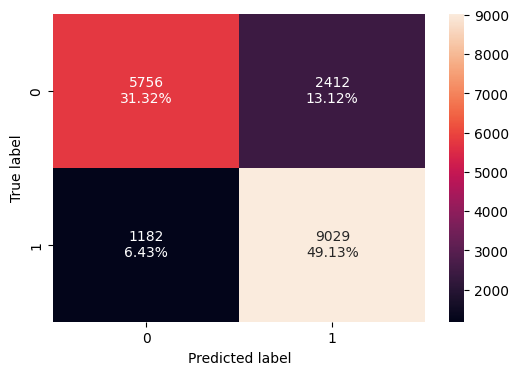

In [ ]:
conf(xgb_grid, x_train_over, y_train_over)

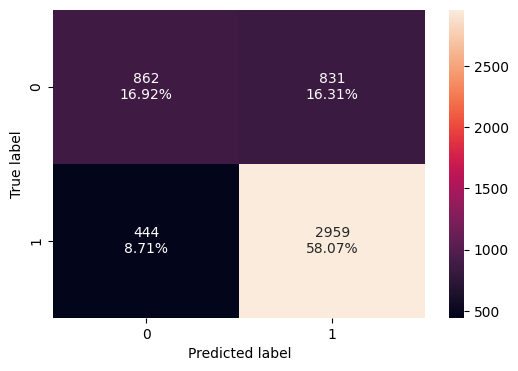

In [ ]:
conf(xgb_grid, x_val, y_val)

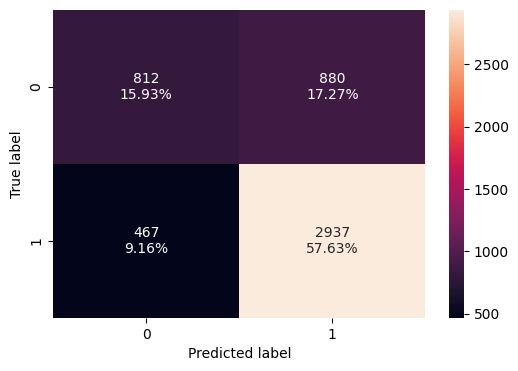

In [ ]:
conf(xgb_grid,x_test,y_test)

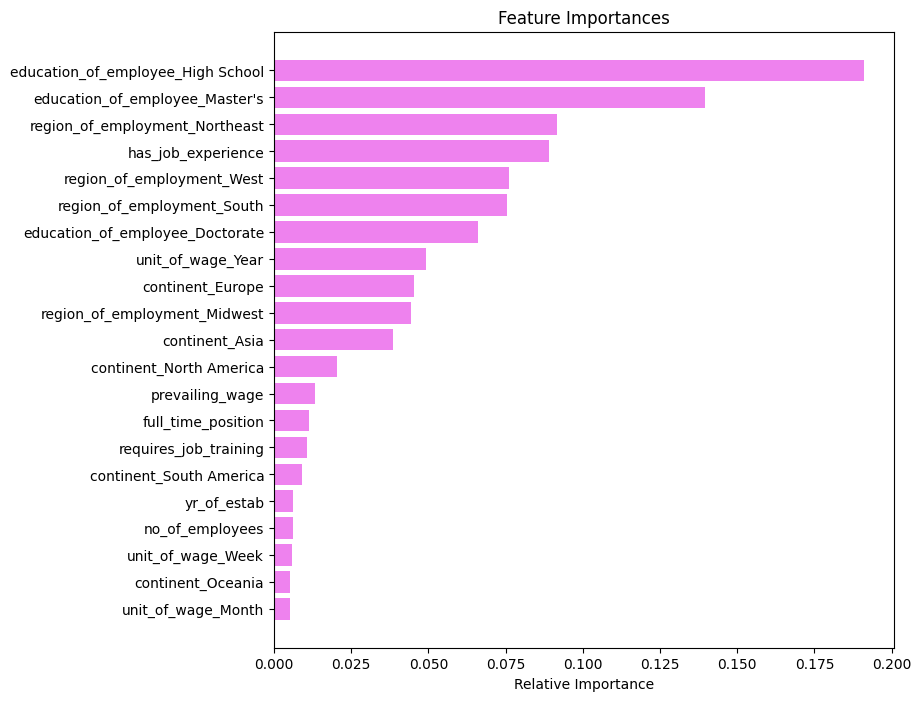

In [ ]:
feature_names = x_test.columns.tolist()
importances = xgb_grid.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The feature importance graph shoes that employee education of high school has the more importance fowwed by masters education.
* This shows that education of the employee is the crucial deciding factor for visa certification and rejection followed by northeast employment and job experience.

#Conclusions and recommendations

* The final model has the f1 score of 0.82 which indicates that model can predict 82% of the visa certification and rejection.
* The feature importance shows the employess with atleast high school education or masters education can get their visa approved.
* The exploratory data analysis showed that a fulltime employment has a high likelihood for visa approval. So its recommended to get a full time job before applying for visa preferrably in the northeast region.
* It is also recommended to get a experience on the job as job experience has a high likelihood for visa approval and so as the employee doesnt require job training.
* Employees from Asian continent have the highest frequency of job applications. The feature importances and exploratory data analysis also shows that employees from asia and europe continent have a highlikelihood for visa approval.
* Employees having yearly wages tend to have a high likelihood for visa approval. Its recommended to have a yearly unit wages than hourly or weekly.